In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [8]:
# df = pd.read_csv('C:/Users/govindd1/Desktop/Code/VR-Project/ACC_data_from_different_subjects/E4_ACC_data_2.csv')
df = pd.read_csv('E4_ACC_data_2.csv')
df['Magnitude'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)

df.head()

,datatime,acc_x,acc_y,acc_z,subject_id,round,type,label,Magnitude
0,2021-10-27 16:19:17+00:00,-14,22,55,2,1,MotionLess,standing,60.868711
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,2,1,MotionLess,standing,66.045439
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,2,1,MotionLess,standing,63.015871
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,2,1,MotionLess,standing,64.078077
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,2,1,MotionLess,standing,70.434367


In [9]:
df

,datatime,acc_x,acc_y,acc_z,subject_id,round,type,label,Magnitude
0,2021-10-27 16:19:17+00:00,-14,22,55,2,1,MotionLess,standing,60.868711
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,2,1,MotionLess,standing,66.045439
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,2,1,MotionLess,standing,63.015871
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,2,1,MotionLess,standing,64.078077
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,2,1,MotionLess,standing,70.434367
...,...,...,...,...,...,...,...,...,...
111899,2021-12-08 14:51:42.468750+00:00,-32,34,43,3,1,MotionLess,sitting,63.474404
111900,2021-12-08 14:51:42.500000+00:00,-32,34,43,3,1,MotionLess,sitting,63.474404
111901,2021-12-08 14:51:42.531250+00:00,-32,34,43,3,1,MotionLess,sitting,63.474404
111902,2021-12-08 14:51:42.562500+00:00,-32,34,44,3,1,MotionLess,sitting,64.156060


In [10]:
df['label'].value_counts()

sitting       41228
walking       33379
standing      21811
upstairs       8638
downstairs     6848
Name: label, dtype: int64

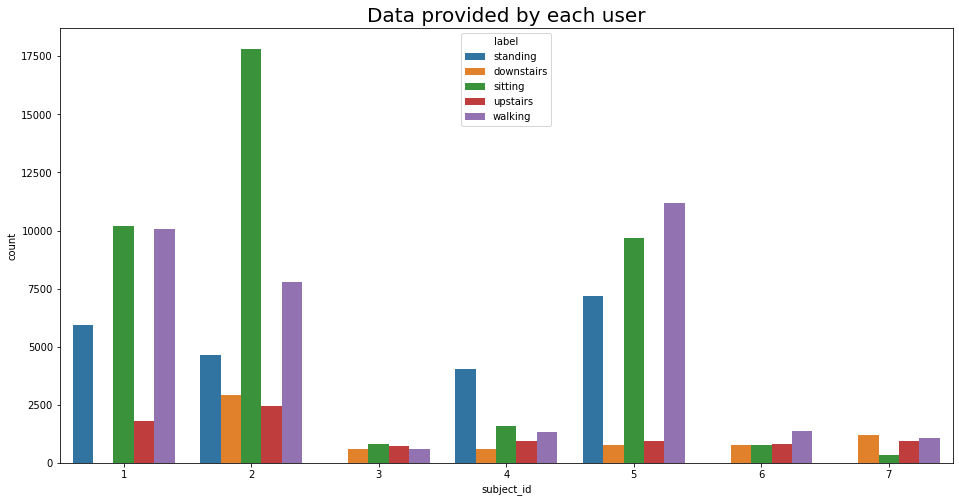

In [6]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = df)
plt.show()


In [14]:
group_by_label = df.groupby(by=['type'])
gpdf = group_by_label.get_group('InMotion')
gpdf


,datatime,acc_x,acc_y,acc_z,subject_id,round,type,label,Magnitude
18752,2021-10-27 16:13:08+00:00,2,2,56,2,1,InMotion,downstairs,56.071383
18753,2021-10-27 16:13:08.031250+00:00,1,2,57,2,1,InMotion,downstairs,57.043843
18754,2021-10-27 16:13:08.062500+00:00,0,3,61,2,1,InMotion,downstairs,61.073726
18755,2021-10-27 16:13:08.093750+00:00,1,2,64,2,1,InMotion,downstairs,64.039051
18756,2021-10-27 16:13:08.125000+00:00,2,2,60,2,1,InMotion,downstairs,60.066630
...,...,...,...,...,...,...,...,...,...
111080,2021-12-08 14:51:11.875000+00:00,-20,17,53,3,1,InMotion,walking,59.143892
111081,2021-12-08 14:51:11.906250+00:00,-19,17,53,3,1,InMotion,walking,58.813264
111082,2021-12-08 14:51:11.937500+00:00,-20,17,51,3,1,InMotion,walking,57.358522
111083,2021-12-08 14:51:11.968750+00:00,-23,19,52,3,1,InMotion,walking,59.949979


<AxesSubplot:>

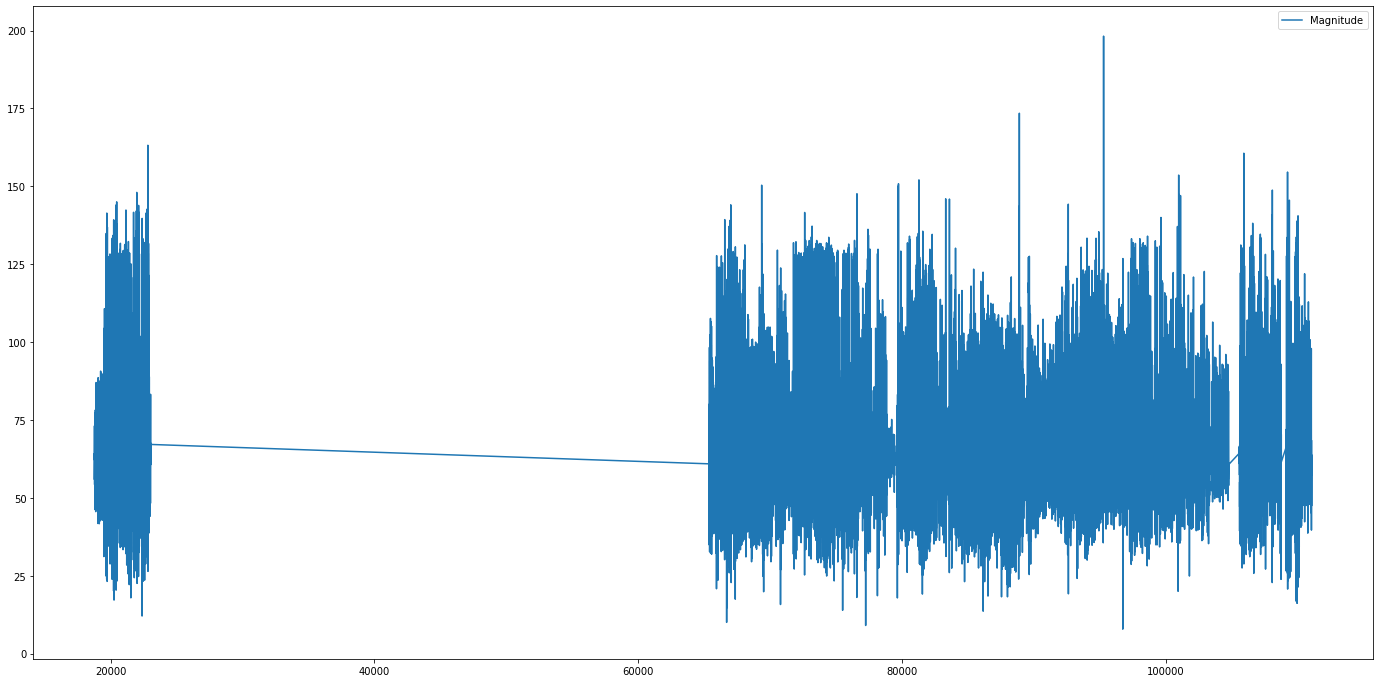

In [15]:
ax = gpdf[['datatime', 'Magnitude']].plot(figsize=(24, 12))
ax

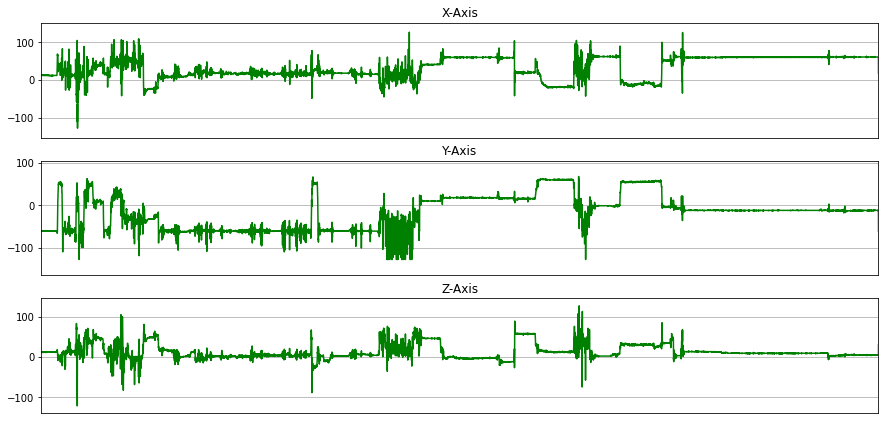

In [12]:
# gpdf[['acc_x']].plot(subplots=True, figsize=(33, 10))
# gpdf[['acc_y']].plot(subplots=True, figsize=(33, 10), color = 'red')
# gpdf[['acc_z']].plot(subplots=True, figsize=(33, 10), color = 'green')


def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
plot_axis(ax0, gpdf['datatime'], gpdf['acc_x'], 'X-Axis')
plot_axis(ax1, gpdf['datatime'], gpdf['acc_y'], 'Y-Axis')
plot_axis(ax2, gpdf['datatime'], gpdf['acc_z'], 'Z-Axis')
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(top=0.90)
plt.show()


In [1]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['type'] == "MotionLess") & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()




NameError: name 'df' is not defined

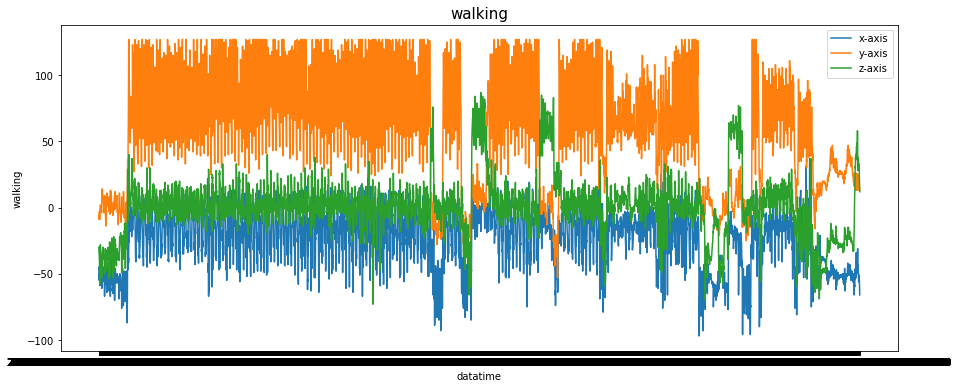

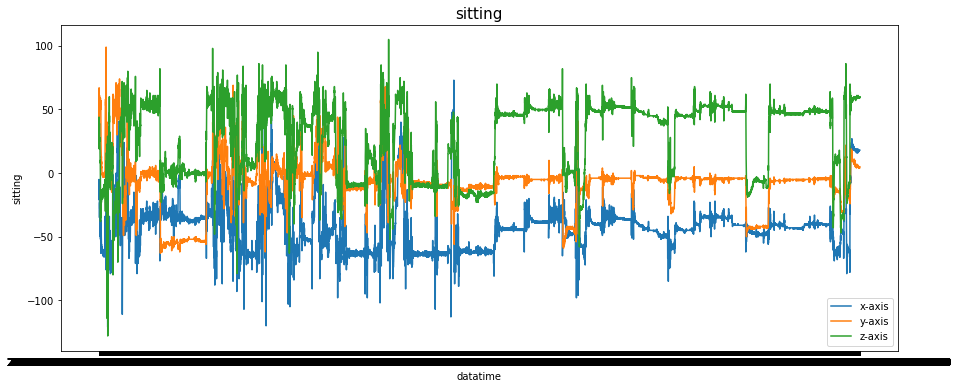

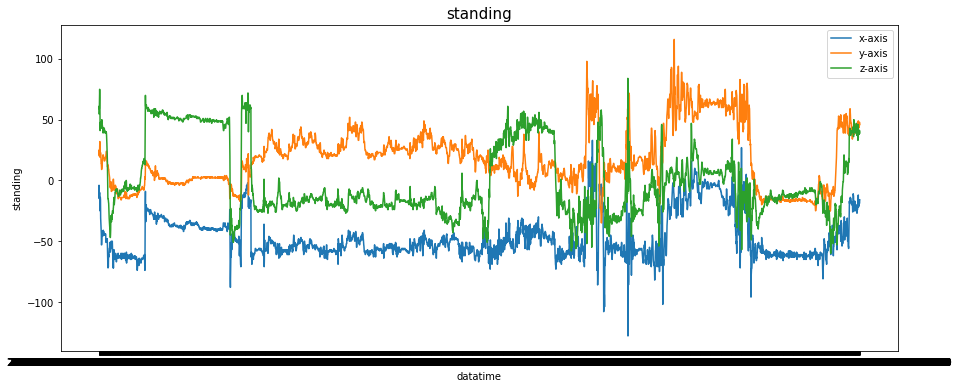

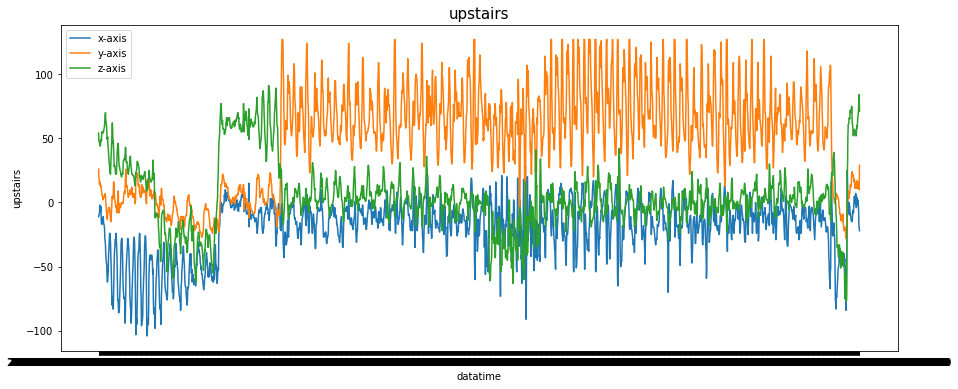

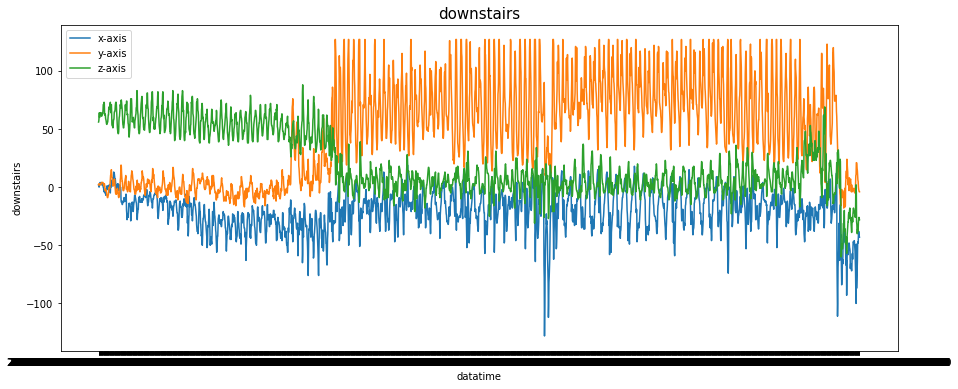

In [18]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 2) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

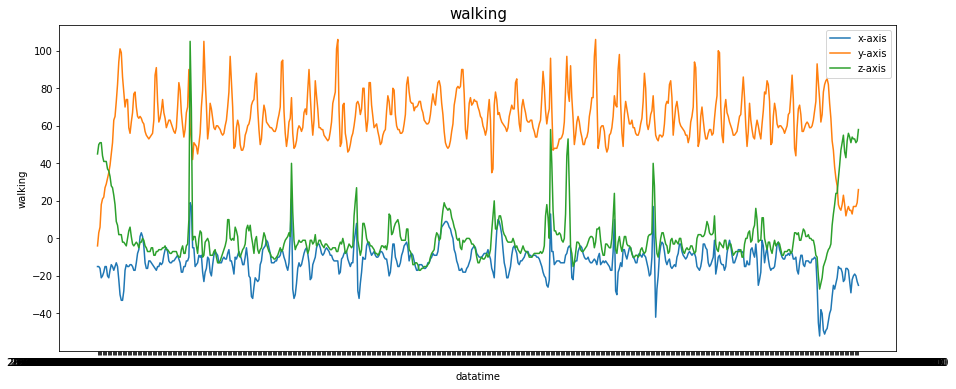

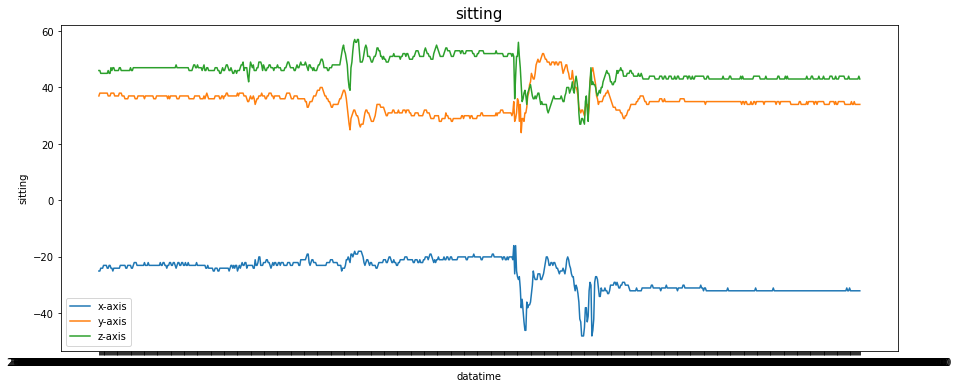

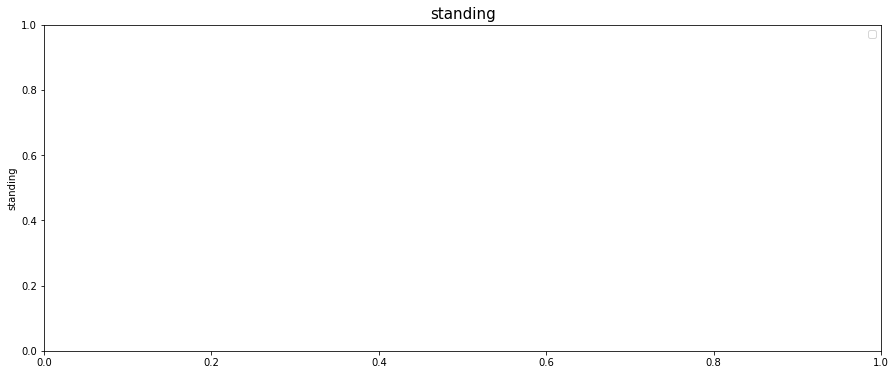

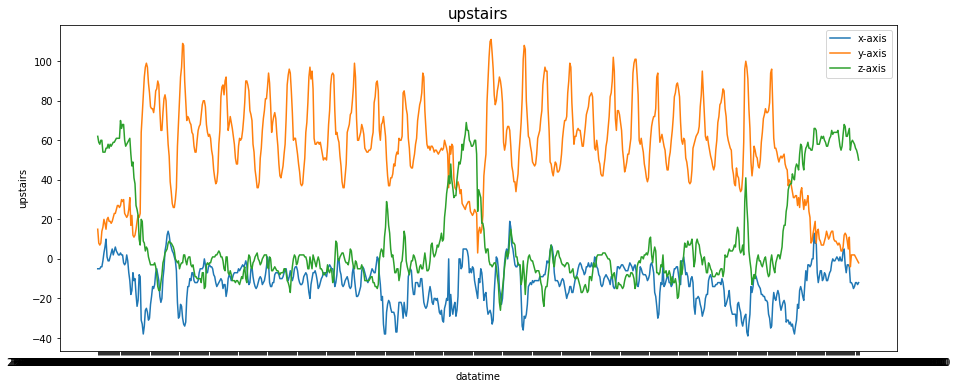

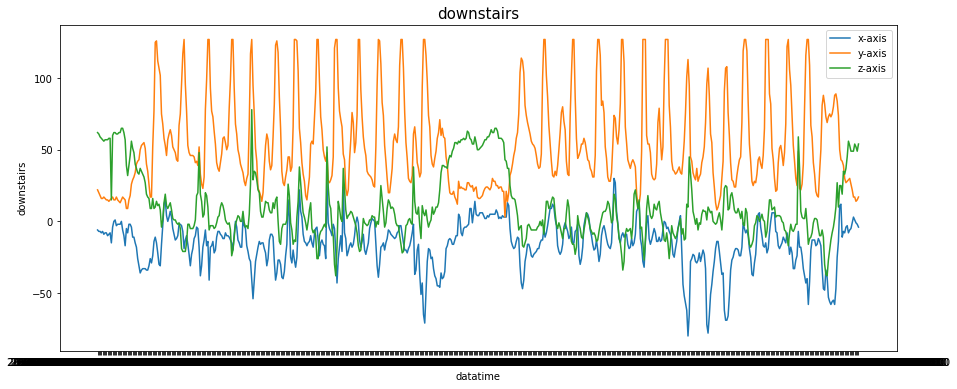

In [7]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 3) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

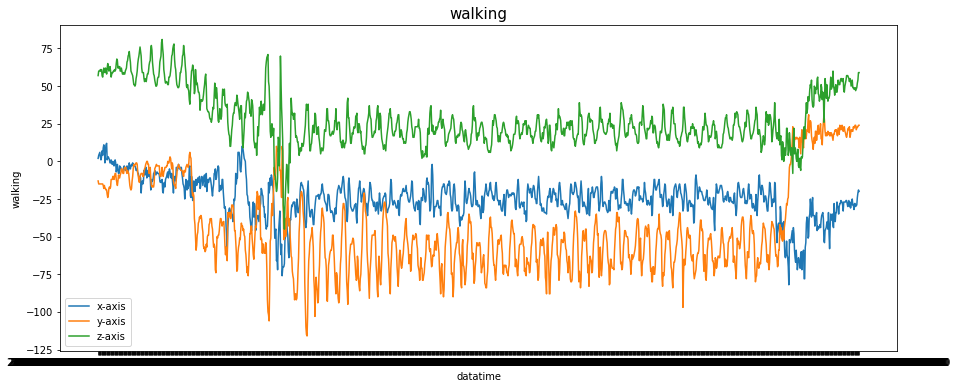

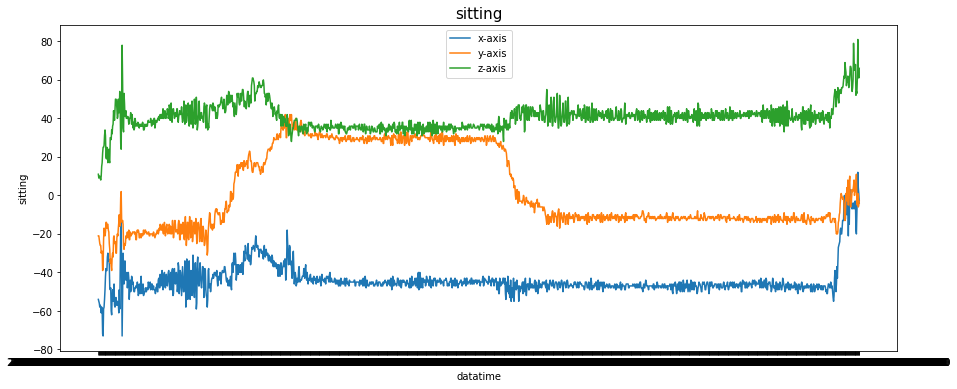

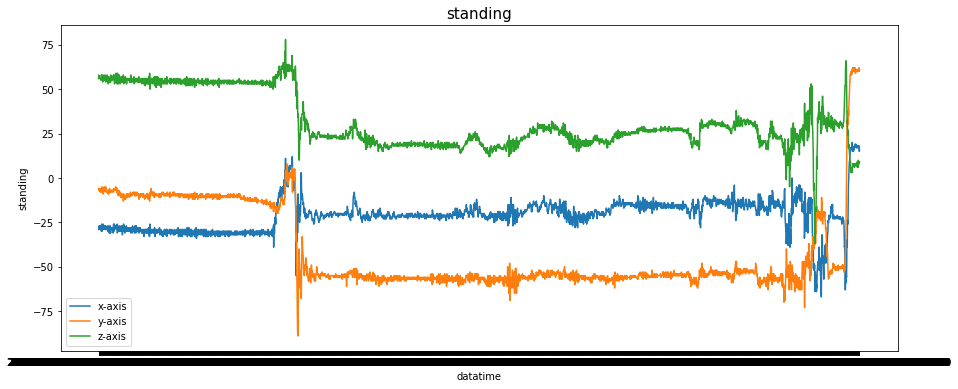

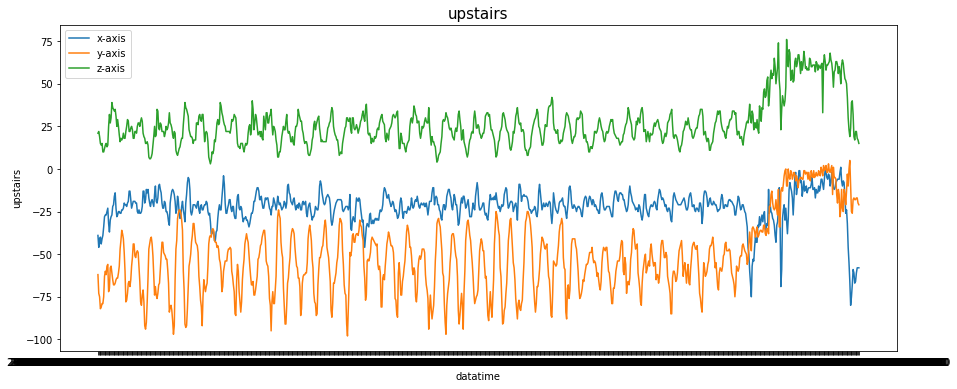

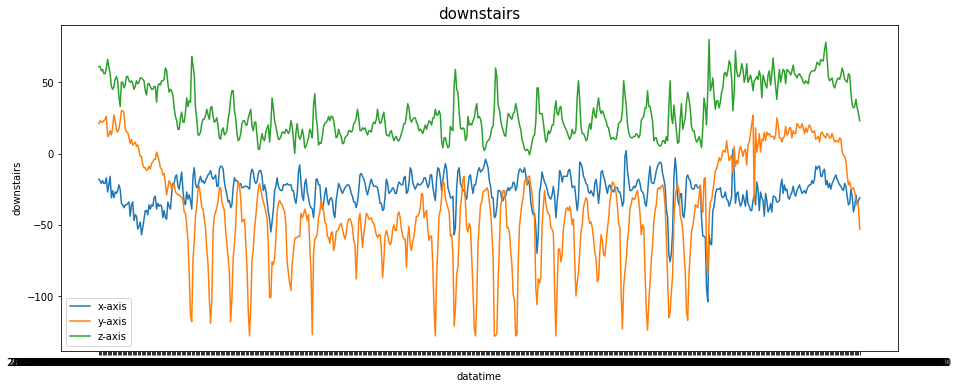

In [20]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 4) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

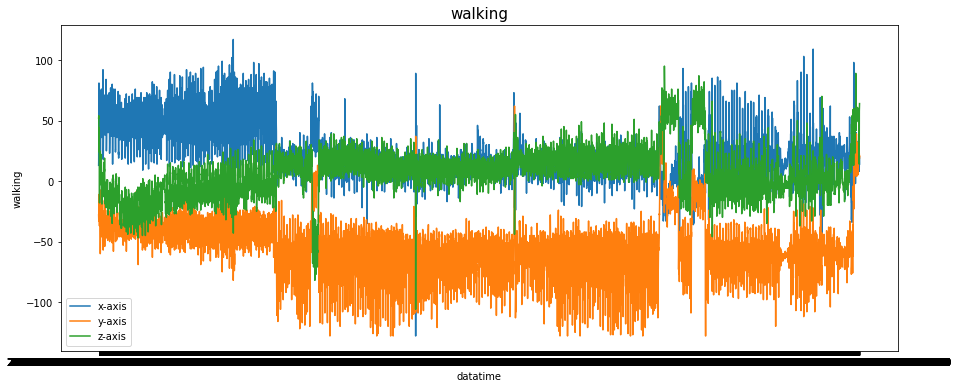

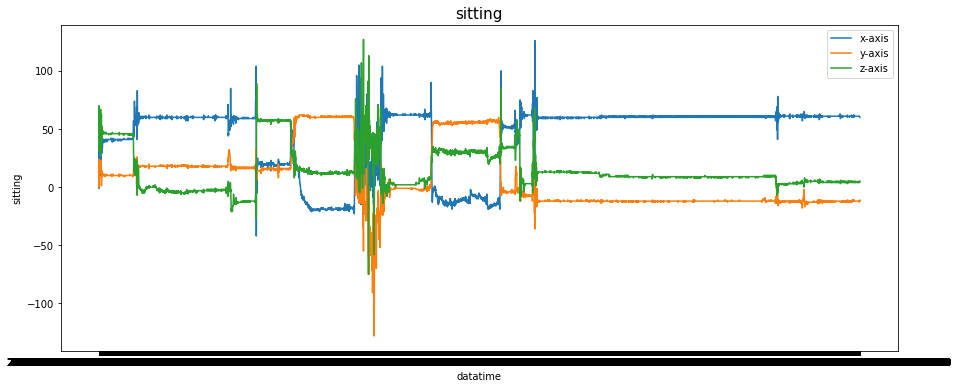

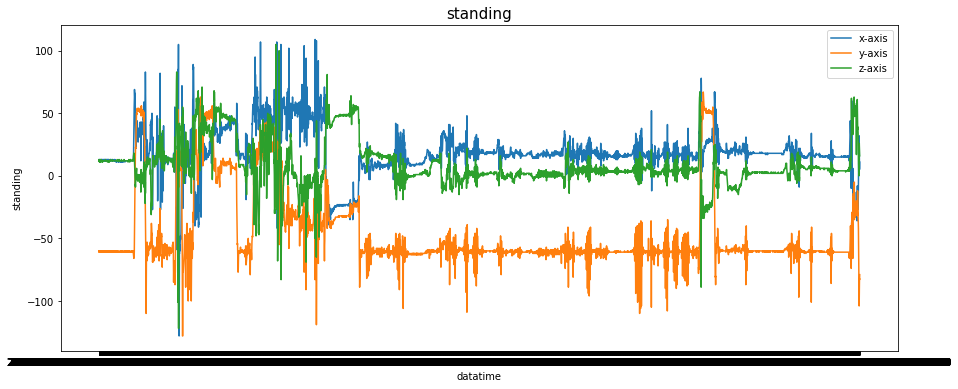

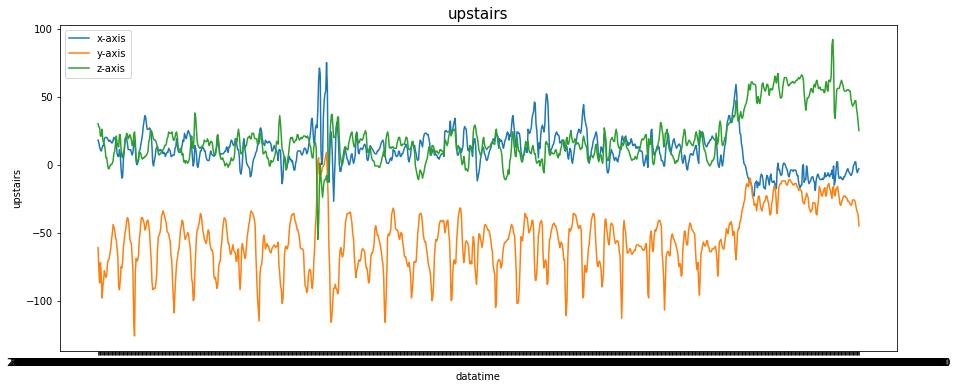

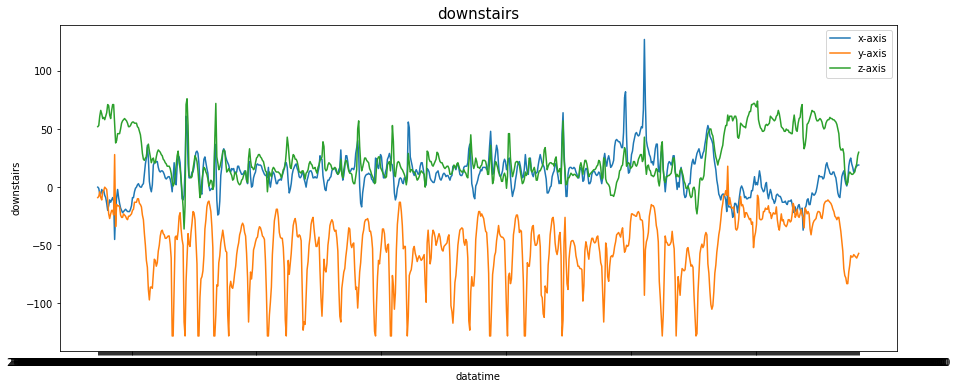

In [21]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 5) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

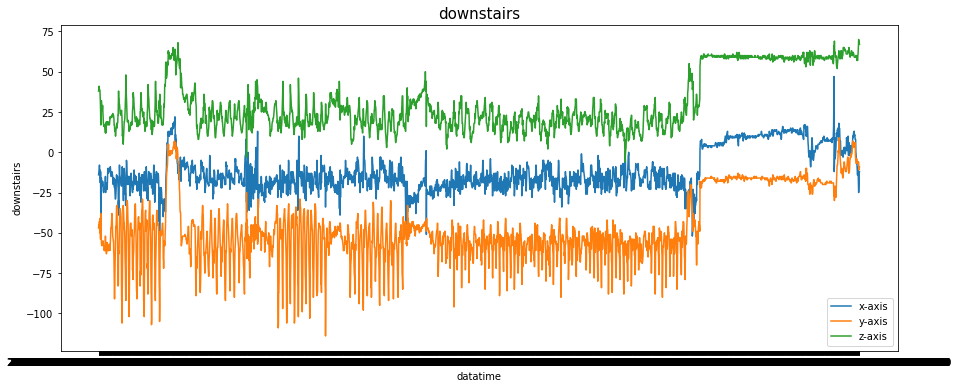

In [11]:
group_by_label = df.groupby(by=['subject_id'])
gpdf5 = group_by_label.get_group(6)

plt.figure(figsize = (15, 6))
sns.lineplot(y = 'acc_x', x = 'datatime', data = gpdf5)
sns.lineplot(y = 'acc_y', x = 'datatime', data = gpdf5)
sns.lineplot(y = 'acc_z', x = 'datatime', data = gpdf5)
plt.legend(['x-axis', 'y-axis', 'z-axis'])
plt.ylabel(i)
plt.title(i, fontsize = 15)
plt.show()

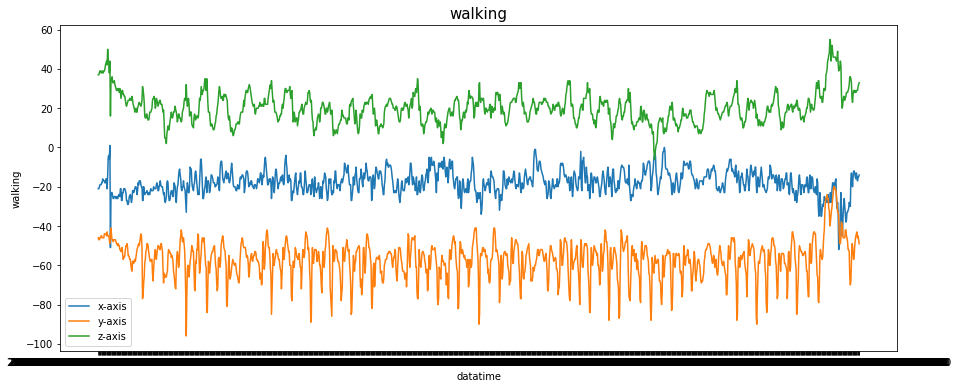

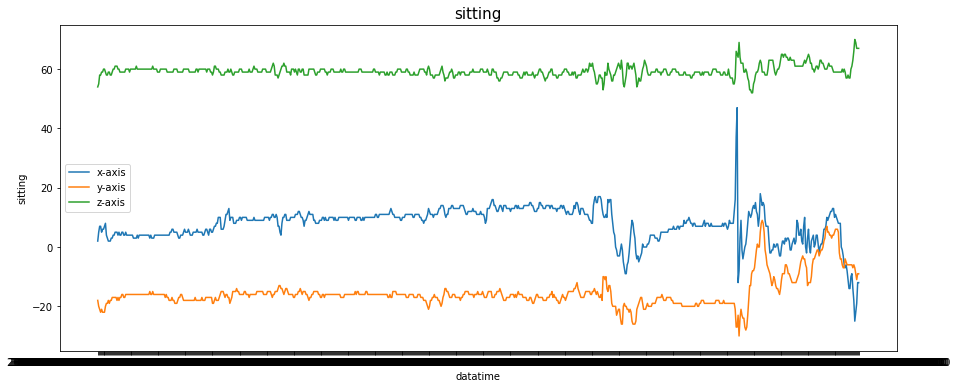

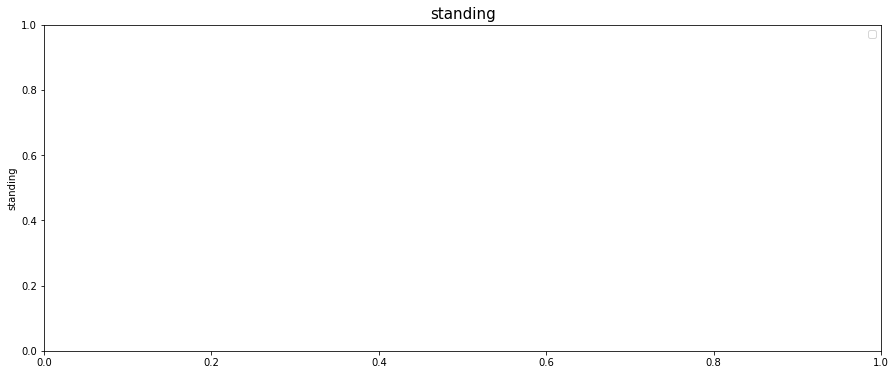

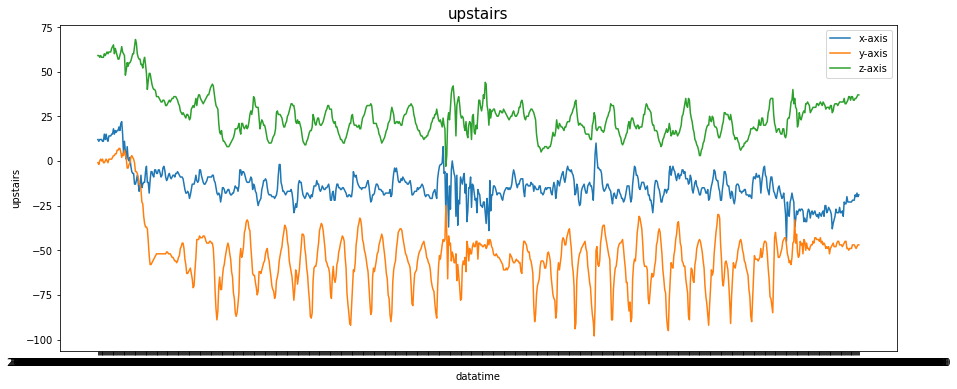

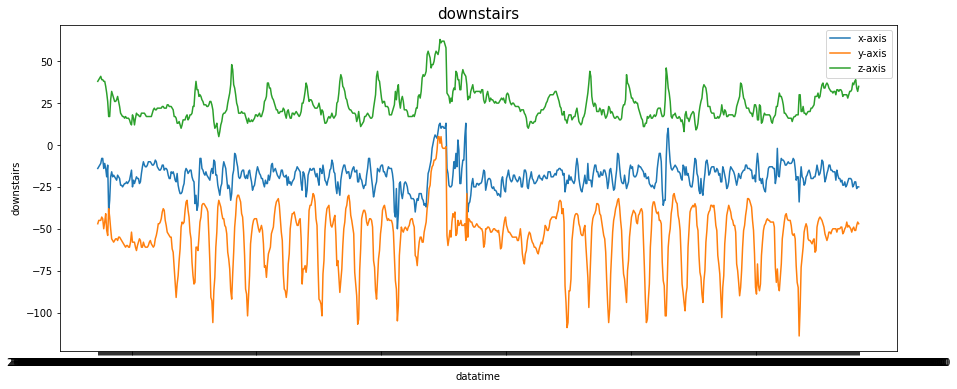

In [8]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 6) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

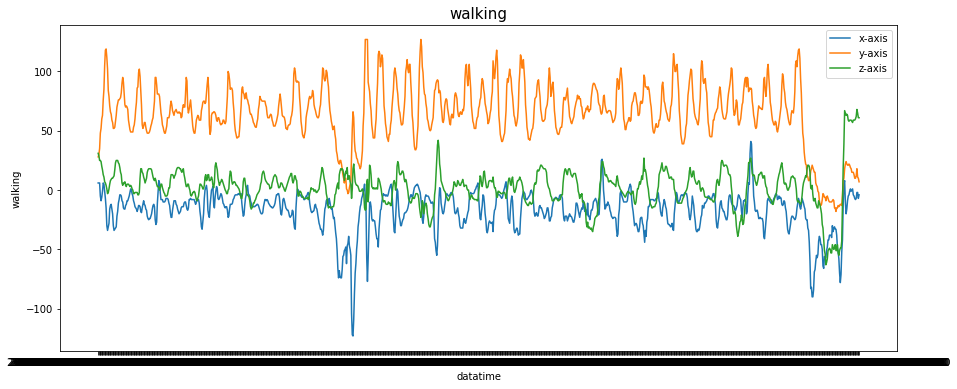

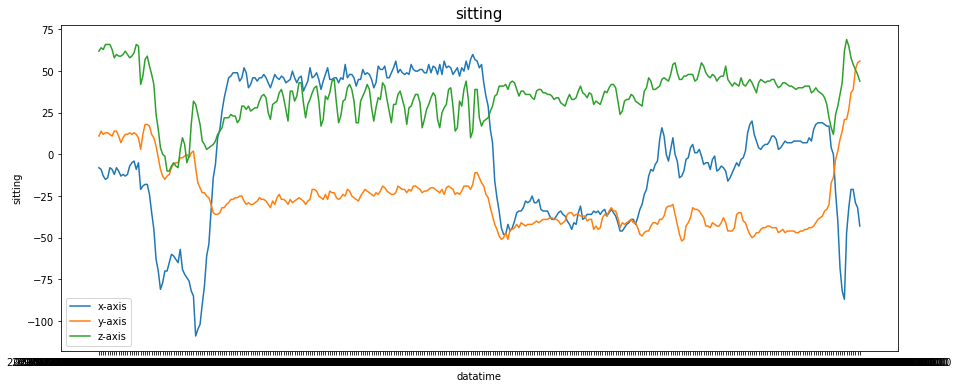

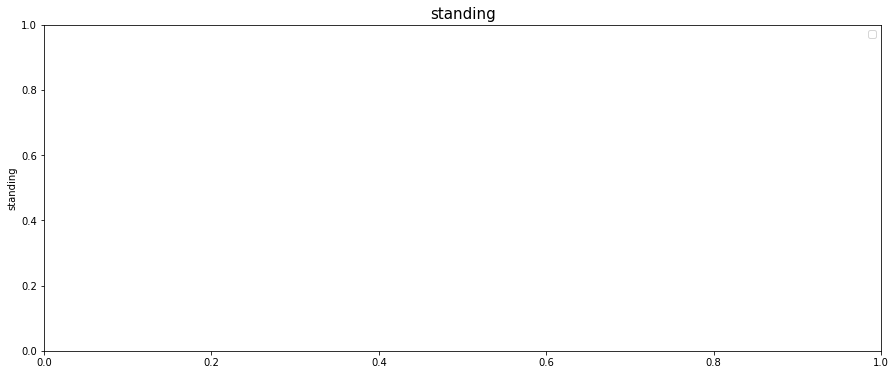

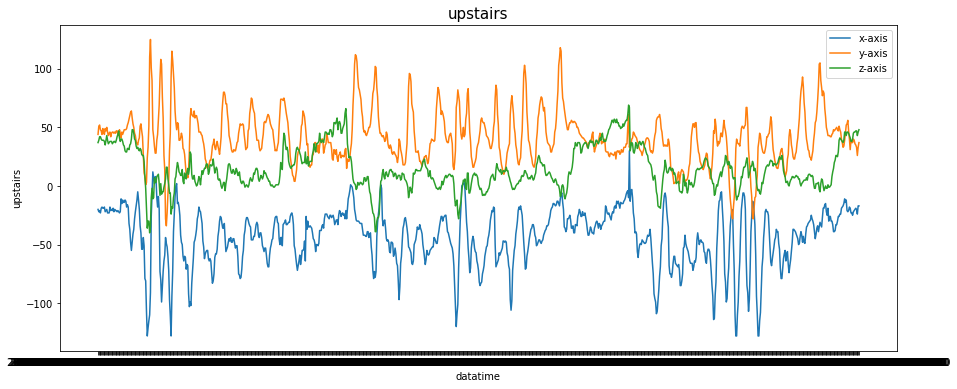

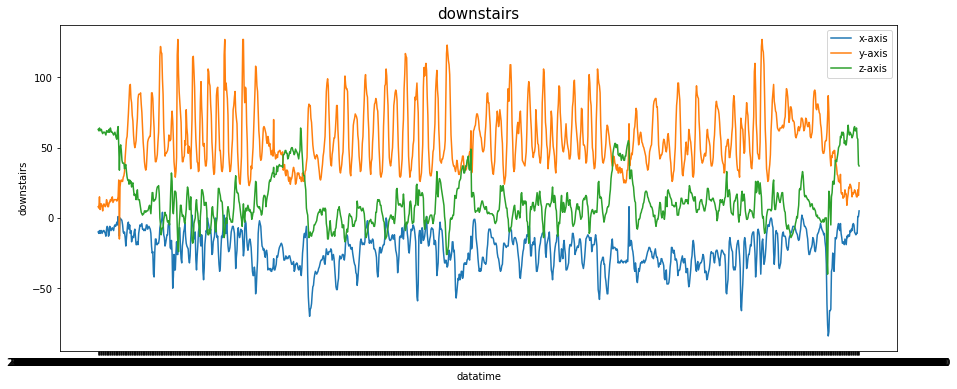

In [9]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 7) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

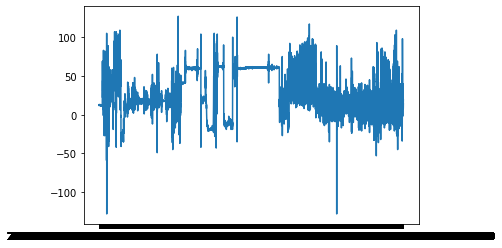

In [25]:
# gpdf5[['acc_x']].plot(subplots=True, figsize=(33, 10))
# gpdf5[['acc_y']].plot(subplots=True, figsize=(33, 10))
# gpdf5[['acc_z']].plot(subplots=True, figsize=(33, 10))

plt.plot(gpdf5['datatime'], gpdf5['acc_x'])

In [10]:
import plotly.express as px

fig = px.line(gpdf5, x="datatime", y="acc_x")
fig.show()


NameError: name 'gpdf5' is not defined

In [12]:
df.value_counts()

datatime                          acc_x  acc_y  acc_z  subject_id  round  type        label   
2021-10-27 15:37:10+00:00          5      10     61    1           1      InMotion    walking     1
2021-11-09 01:08:36.531250+00:00   57    -38     14    5           1      InMotion    walking     1
2021-11-09 01:08:36.875000+00:00   40    -30    -13    5           1      InMotion    walking     1
2021-11-09 01:08:36.843750+00:00   44    -39    -13    5           1      InMotion    walking     1
2021-11-09 01:08:36.812500+00:00   66    -53     0     5           1      InMotion    walking     1
                                                                                                 ..
2021-10-27 16:18:00.531250+00:00  -23     127    0     2           1      InMotion    upstairs    1
2021-10-27 16:18:00.500000+00:00  -6      127   -5     2           1      InMotion    upstairs    1
2021-10-27 16:18:00.468750+00:00  -3      127   -5     2           1      InMotion    upstairs    1
2021-

In [13]:
df[['acc_x', 'acc_y', 'acc_z']].describe()

,acc_x,acc_y,acc_z
count,111904.000000,111904.000000,111904.000000
mean,0.854447,0.717937,20.218911
std,37.587359,44.900835,25.618164
min,-128.000000,-128.000000,-128.000000
25%,-30.000000,-30.000000,2.000000
50%,2.000000,-4.000000,16.000000
75%,31.000000,34.000000,46.000000
max,127.000000,127.000000,127.000000


In [14]:
df['label'].value_counts()

sitting       41228
walking       33379
standing      21811
upstairs       8638
downstairs     6848
Name: label, dtype: int64

# Balancing the Class


Class=2, n=41228 (20.000%)
Class=0, n=41228 (20.000%)
Class=1, n=41228 (20.000%)
Class=3, n=41228 (20.000%)
Class=4, n=41228 (20.000%)


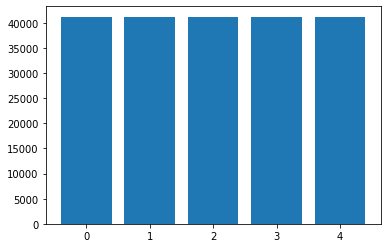

In [15]:
X = df[['acc_x', 'acc_y', 'acc_z']]
y = df['label']

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter


y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [16]:
X

,acc_x,acc_y,acc_z
0,-14,22,55
1,-4,25,61
2,-7,21,59
3,-15,20,59
4,-11,22,66
...,...,...,...
206135,16,-84,17
206136,76,22,14
206137,13,-23,6
206138,44,46,46


In [17]:

dfy = pd.DataFrame(y)
dfy

,0
0,2
1,2
2,2
3,2
4,2
...,...
206135,4
206136,4
206137,4
206138,4


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Accuracy: 0.8084069079266518

 ------------------------------------------ RandomForestClassifier() Classification Report-------------------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      8144
           1       0.91      0.89      0.90      8266
           2       0.84      0.83      0.83      8290
           3       0.76      0.81      0.79      8187
           4       0.74      0.67      0.70      8341

    accuracy                           0.81     41228
   macro avg       0.81      0.81      0.81     41228
weighted avg       0.81      0.81      0.81     41228

 ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------


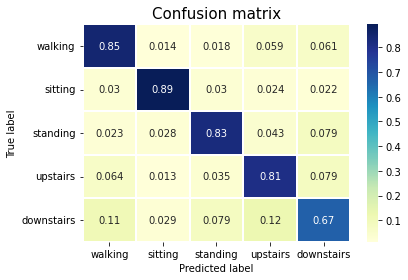

----------------------------------------------  RandomForestClassifier() K-Fold Report  ------------------------------------------------------ 

 * Results: [0.79256816 0.79356263 0.7898273  0.79470263]

 * Average acuracy: 0.7926651790045601 

<--------------------------------------------------------   END   ------------------------------------------------------------------>


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



classifiers = [
# KNeighborsClassifier(3)
# SVC(kernel="rbf", C=0.025, probability=True),
# NuSVC(probability=True),
RandomForestClassifier()
# DecisionTreeClassifier()
# AdaBoostClassifier()
# GradientBoostingClassifier()
]
for classifier in classifiers:
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                   ('classifier', classifier)])
# pipe.fit(X_train, y_train)   
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n ------------------------------------------", classifier , "Classification Report-------------------------------------------------\n")
    print(classification_report(y_test, y_pred))    

# K-Fold 
kfold = 4
results = cross_val_score(classifier, X_train, y_train, cv=kfold)


print(" ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------")
labels = ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']
_y_test = y_test
_y_pred = y_pred
confusion_matrix = confusion_matrix(_y_test, _y_pred)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# print(" ------------------------------------------------------ AUC SCORE -------------------------------------------------------------------")
# skplt.metrics.plot_roc_curve(y_test, y_pred)
# plt.show()
    
print("---------------------------------------------- ", classifier , "K-Fold Report  ------------------------------------------------------", "\n")
# print("model score: %.3f" % pipe.score(X_test, y_test))
# print('------------------------------------   REPORT   ----------------------------------', "\n")
print(' * Results: {}'.format(results))
print('\n * Average acuracy: {}'.format(np.mean(results)), "\n")

print('<--------------------------------------------------------   END   ------------------------------------------------------------------>')

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_probabilty = classifier.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_probabilty, multi_class = "ovr" ))

0.9590319557262953


# Feature Engineering 


In [14]:
X['Magnitude'] = np.sqrt(X['acc_x']**2 + X['acc_y']**2 + X['acc_z']**2)
X['Magnitude']

0         60.868711
1         66.045439
2         63.015871
3         64.078077
4         70.434367
            ...    
307725    50.408333
307726    56.115951
307727    63.206012
307728    58.318093
307729    63.725976
Name: Magnitude, Length: 307730, dtype: float64

In [17]:
X

,acc_x,acc_y,acc_z,Magnitude
0,-14,22,55,60.868711
1,-4,25,61,66.045439
2,-7,21,59,63.015871
3,-15,20,59,64.078077
4,-11,22,66,70.434367
...,...,...,...,...
307725,-4,50,5,50.408333
307726,3,-56,2,56.115951
307727,-37,-5,51,63.206012
307728,-1,22,54,58.318093


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Accuracy: 0.7495206837162448

 ------------------------------------------ RandomForestClassifier() Classification Report-------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     12451
           1       0.73      0.74      0.74     12389
           2       0.79      0.81      0.80     12186
           3       0.78      0.84      0.81     12461
           4       0.57      0.47      0.51     12059

    accuracy                           0.75     61546
   macro avg       0.74      0.75      0.74     61546
weighted avg       0.74      0.75      0.74     61546

 ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------


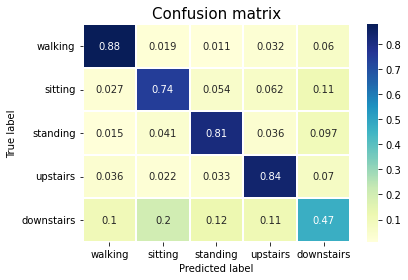

----------------------------------------------  RandomForestClassifier() K-Fold Report  ------------------------------------------------------ 

 * Results: [0.73546616 0.73613232 0.73541741 0.73371137]

 * Average acuracy: 0.7351818152276346 

<--------------------------------------------------------   END   ------------------------------------------------------------------>


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



classifiers = [
# KNeighborsClassifier(3)
# SVC(kernel="rbf", C=0.025, probability=True),
# NuSVC(probability=True),
RandomForestClassifier()
# DecisionTreeClassifier()
# AdaBoostClassifier()
# GradientBoostingClassifier()
]
for classifier in classifiers:
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                   ('classifier', classifier)])
# pipe.fit(X_train, y_train)   
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n ------------------------------------------", classifier , "Classification Report-------------------------------------------------\n")
    print(classification_report(y_test, y_pred))    

# K-Fold 
kfold = 4
results = cross_val_score(classifier, X_train, y_train, cv=kfold)


print(" ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------")
labels = ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']
_y_test = y_test
_y_pred = y_pred
confusion_matrix = confusion_matrix(_y_test, _y_pred)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# print(" ------------------------------------------------------ AUC SCORE -------------------------------------------------------------------")
# skplt.metrics.plot_roc_curve(y_test, y_pred)
# plt.show()
    
print("---------------------------------------------- ", classifier , "K-Fold Report  ------------------------------------------------------", "\n")
# print("model score: %.3f" % pipe.score(X_test, y_test))
# print('------------------------------------   REPORT   ----------------------------------', "\n")
print(' * Results: {}'.format(results))
print('\n * Average acuracy: {}'.format(np.mean(results)), "\n")

print('<--------------------------------------------------------   END   ------------------------------------------------------------------>')

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_probabilty = classifier.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_probabilty, multi_class = "ovr" ))

0.9333402612681265
